In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"
salt = 'MgSO4'

In [38]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['MgCl2 Salt Mass E'] = peakLoad['Peak Load']/0.193056
peakLoad['MgCl2 Salt Mass P'] = peakLoad['Peak Load']/0.084767892
peakLoad['MgCl2 Salt Mass'] = peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E'], axis=1)

peakLoad['SrBr2 Salt Mass E'] = peakLoad['Peak Load']/0.3556
peakLoad['SrBr2 Salt Mass P'] = peakLoad['Peak Load']/0.811253581
peakLoad['SrBr2 Salt Mass'] = peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,SrBr2 Salt Mass
0,1,27.724174,58015.584978,0.238881,98.568777,327.059854,77.964495
1,2,20.164945,41411.346548,0.234433,71.693170,237.884232,56.706819
2,3,18.771555,36953.435376,0.224725,66.739200,221.446522,52.788400
3,4,16.617412,31673.736508,0.217586,59.080496,196.034272,46.730630
4,5,27.902137,59150.390389,0.242000,99.201496,329.159269,78.464953
...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,143.799328,34.278869
396,397,12.662940,24918.728631,0.224640,45.021018,149.383689,35.610069
397,398,4.833286,7854.976581,0.185523,17.183958,57.017881,13.591917
398,399,14.577960,28841.437895,0.225848,51.829559,171.975025,40.995389


In [39]:
rate = 'Fixed_Rate'
size = 'Opt_Size'

In [40]:
# Total costs:
cost_noTES_Fixed = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_noTES_ToD = pd.read_excel(ResultsFolder + 'costs_noTES_' + 'TOU_Rate' +'.xlsx')
cost_MgSO4_Fixed = pd.read_excel(ResultsFolder + 'costs_salt_' + 'Fixed_Rate' + '_' + size + '_'+salt+'.xlsx')
cost_MgSO4_ToD = pd.read_excel(ResultsFolder + 'costs_salt_' + 'TOU_Rate' + '_' + size + '_'+salt+'.xlsx')

# Clean up:
cost_noTES_Fixed = cost_noTES_Fixed.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES_Fixed = cost_noTES_Fixed.sort_values(by=['building id'])
cost_noTES_Fixed = cost_noTES_Fixed.reset_index()
cost_noTES_Fixed = cost_noTES_Fixed[['building id', 'total cost ($)']]

cost_noTES_ToD = cost_noTES_ToD.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES_ToD = cost_noTES_ToD.sort_values(by=['building id'])
cost_noTES_ToD = cost_noTES_ToD.reset_index()
cost_noTES_ToD = cost_noTES_ToD[['building id', 'total cost ($)']]

cost_MgSO4_Fixed = cost_MgSO4_Fixed.rename(columns={'Unnamed: 0': 'building id'})
cost_MgSO4_Fixed = cost_MgSO4_Fixed.sort_values(by=['building id'])
cost_MgSO4_Fixed = cost_MgSO4_Fixed.reset_index()
cost_MgSO4_Fixed = cost_MgSO4_Fixed[['building id', 'total cost ($)']]

cost_MgSO4_ToD = cost_MgSO4_ToD.rename(columns={'Unnamed: 0': 'building id'})
cost_MgSO4_ToD = cost_MgSO4_ToD.sort_values(by=['building id'])
cost_MgSO4_ToD = cost_MgSO4_ToD.reset_index()
cost_MgSO4_ToD = cost_MgSO4_ToD[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES_Fixed['building id']
cost_impacts_TES['total cost - no TES - Fixed'] = cost_noTES_Fixed['total cost ($)']
cost_impacts_TES['total cost - no TES - ToD'] = cost_noTES_ToD['total cost ($)']
cost_impacts_TES['total cost - Fixed'] = cost_MgSO4_Fixed['total cost ($)']
cost_impacts_TES['total cost - ToD'] = cost_MgSO4_ToD['total cost ($)']

cost_impacts_TES['cost saving - Fixed'] = cost_impacts_TES['total cost - no TES - Fixed'] - cost_impacts_TES['total cost - Fixed']
cost_impacts_TES['cost saving - ToD'] = cost_impacts_TES['total cost - no TES - ToD'] - cost_impacts_TES['total cost - ToD']
cost_impacts_TES['cost saving % - Fixed'] = cost_impacts_TES['cost saving - Fixed']/cost_impacts_TES['total cost - no TES - Fixed']
cost_impacts_TES['cost saving % - ToD'] = cost_impacts_TES['cost saving - ToD']/cost_impacts_TES['total cost - no TES - ToD']

cost_impacts_TES['peak load'] = peakLoad['Peak Load']
cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES - Fixed,total cost - no TES - ToD,total cost - Fixed,total cost - ToD,cost saving - Fixed,cost saving - ToD,cost saving % - Fixed,cost saving % - ToD,peak load
0,1,3526.290877,2923.118923,3411.853730,2565.468290,114.437147,357.650633,0.032453,0.122352,27.724174
1,2,2523.385394,2092.849473,2439.361398,1829.530531,84.023996,263.318942,0.033298,0.125818,20.164945
2,3,2254.533101,1853.386274,2175.504185,1621.334444,79.028916,232.051830,0.035053,0.125204,18.771555
3,4,1938.359969,1596.729857,1868.762140,1391.823284,69.597829,204.906572,0.035906,0.128329,16.617412
4,5,3591.834993,2972.629172,3476.731842,2611.233692,115.103151,361.395480,0.032046,0.121574,27.902137
...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1199.333628,1387.327722,1038.930532,49.592401,160.403096,0.034513,0.133744,12.189566
396,397,1535.499790,1286.603411,1487.147655,1123.254569,48.352134,163.348842,0.031490,0.126961,12.662940
397,398,491.584576,413.840107,473.586949,356.542415,17.997627,57.297692,0.036611,0.138454,4.833286
398,399,1766.304961,1462.748073,1707.027850,1276.963125,59.277111,185.784948,0.033560,0.127011,14.577960


In [41]:
# Calc total cost saving per kg/kWh due to TES:

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9

if salt == 'MgSO4':
    cost_impacts_TES['saving per kg - Fixed'] = cost_impacts_TES['cost saving - Fixed']/cost_impacts_TES['MgSO4 Salt Mass']*20
    cost_impacts_TES['saving per kg - ToD'] = cost_impacts_TES['cost saving - ToD']/cost_impacts_TES['MgSO4 Salt Mass']*20
    cost_impacts_TES['saving per kWh - Fixed'] = cost_impacts_TES['saving per kg - Fixed']*0.75
    cost_impacts_TES['saving per kWh - ToD'] = cost_impacts_TES['saving per kg - ToD']*0.75
elif salt == 'MgCl2':
    cost_impacts_TES['saving per kg - Fixed'] = cost_impacts_TES['cost saving - Fixed']/cost_impacts_TES['MgCl2 Salt Mass']*20
    cost_impacts_TES['saving per kg - ToD'] = cost_impacts_TES['cost saving - ToD']/cost_impacts_TES['MgCl2 Salt Mass']*20
    cost_impacts_TES['saving per kWh - Fixed'] = cost_impacts_TES['saving per kg - Fixed']*0.193056
    cost_impacts_TES['saving per kWh - ToD'] = cost_impacts_TES['saving per kg - ToD']*0.193056
elif salt == 'SrBr2':
    cost_impacts_TES['saving per kg - Fixed'] = cost_impacts_TES['cost saving - Fixed']/cost_impacts_TES['SrBr2 Salt Mass']*20
    cost_impacts_TES['saving per kg - ToD'] = cost_impacts_TES['cost saving - ToD']/cost_impacts_TES['SrBr2 Salt Mass']*20
    cost_impacts_TES['saving per kWh - Fixed'] = cost_impacts_TES['saving per kg - Fixed']*0.3556
    cost_impacts_TES['saving per kWh - ToD'] = cost_impacts_TES['saving per kg - ToD']*0.3556

cost_impacts_TES['peak load'] = peakLoad['Peak Load']
cost_impacts_TES

,building id,total cost - no TES - Fixed,total cost - no TES - ToD,total cost - Fixed,total cost - ToD,cost saving - Fixed,cost saving - ToD,cost saving % - Fixed,cost saving % - ToD,peak load,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,SrBr2 Salt Mass,saving per kg - Fixed,saving per kg - ToD,saving per kWh - Fixed,saving per kWh - ToD
0,1,3526.290877,2923.118923,3411.853730,2565.468290,114.437147,357.650633,0.032453,0.122352,27.724174,27.724174,58015.584978,0.238881,98.568777,327.059854,77.964495,23.219756,72.568747,17.414817,54.426560
1,2,2523.385394,2092.849473,2439.361398,1829.530531,84.023996,263.318942,0.033298,0.125818,20.164945,20.164945,41411.346548,0.234433,71.693170,237.884232,56.706819,23.439889,73.457190,17.579916,55.092892
2,3,2254.533101,1853.386274,2175.504185,1621.334444,79.028916,232.051830,0.035053,0.125204,18.771555,18.771555,36953.435376,0.224725,66.739200,221.446522,52.788400,23.682908,69.539890,17.762181,52.154917
3,4,1938.359969,1596.729857,1868.762140,1391.823284,69.597829,204.906572,0.035906,0.128329,16.617412,16.617412,31673.736508,0.217586,59.080496,196.034272,46.730630,23.560340,69.365217,17.670255,52.023913
4,5,3591.834993,2972.629172,3476.731842,2611.233692,115.103151,361.395480,0.032046,0.121574,27.902137,27.902137,59150.390389,0.242000,99.201496,329.159269,78.464953,23.205931,72.860894,17.404448,54.645670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1199.333628,1387.327722,1038.930532,49.592401,160.403096,0.034513,0.133744,12.189566,12.189566,23415.204886,0.219283,43.338012,143.799328,34.278869,22.886330,74.024206,17.164747,55.518154
396,397,1535.499790,1286.603411,1487.147655,1123.254569,48.352134,163.348842,0.031490,0.126961,12.662940,12.662940,24918.728631,0.224640,45.021018,149.383689,35.610069,21.479805,72.565592,16.109854,54.424194
397,398,491.584576,413.840107,473.586949,356.542415,17.997627,57.297692,0.036611,0.138454,4.833286,4.833286,7854.976581,0.185523,17.183958,57.017881,13.591917,20.947010,66.687421,15.710257,50.015565
398,399,1766.304961,1462.748073,1707.027850,1276.963125,59.277111,185.784948,0.033560,0.127011,14.577960,14.577960,28841.437895,0.225848,51.829559,171.975025,40.995389,22.873863,71.690731,17.155397,53.768048


In [42]:
# Dot plot:
ordered_cost_reset = cost_impacts_TES.sort_values(by='peak load')
ordered_cost_reset = ordered_cost_reset.reset_index()
ordered_cost_reset['building'] = ordered_cost_reset.index + 1
ordered_cost_reset

,index,building id,total cost - no TES - Fixed,total cost - no TES - ToD,total cost - Fixed,total cost - ToD,cost saving - Fixed,cost saving - ToD,cost saving % - Fixed,cost saving % - ToD,...,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,SrBr2 Salt Mass,saving per kg - Fixed,saving per kg - ToD,saving per kWh - Fixed,saving per kWh - ToD,building
0,304,305,280.292317,235.140437,269.204534,201.779601,11.087784,33.360836,0.039558,0.141876,...,4494.552000,0.175031,10.421934,34.580891,8.243389,21.277786,64.020433,15.958339,48.015325,1
1,210,211,320.706929,268.681780,306.432181,227.238480,14.274748,41.443300,0.044510,0.154247,...,5129.930228,0.179204,11.618214,38.550254,9.189606,24.573050,71.341946,18.429788,53.506460,2
2,233,234,302.507901,253.705415,288.808238,213.706731,13.699663,39.998684,0.045287,0.157658,...,4804.581801,0.164414,11.860219,39.353249,9.381024,23.101871,67.450159,17.326403,50.587619,3
3,338,339,351.177610,290.420045,336.725184,247.156537,14.452427,43.263507,0.041154,0.148969,...,5666.573658,0.193317,11.896726,39.474380,9.409899,24.296478,72.731790,18.222359,54.548843,4
4,99,100,439.196709,369.762970,421.669956,314.962606,17.526753,54.800364,0.039906,0.148204,...,7017.284235,0.179766,15.843009,52.568494,12.531272,22.125536,69.179239,16.594152,51.884429,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,386,3466.234461,2884.303821,3356.766936,2529.658526,109.467525,354.645295,0.031581,0.122957,...,56719.004778,0.236815,97.206532,322.539805,76.887006,22.522669,72.967380,16.892002,54.725535,396
396,0,1,3526.290877,2923.118923,3411.853730,2565.468290,114.437147,357.650633,0.032453,0.122352,...,58015.584978,0.238881,98.568777,327.059854,77.964495,23.219756,72.568747,17.414817,54.426560,397
397,4,5,3591.834993,2972.629172,3476.731842,2611.233692,115.103151,361.395480,0.032046,0.121574,...,59150.390389,0.242000,99.201496,329.159269,78.464953,23.205931,72.860894,17.404448,54.645670,398
398,399,400,3539.585834,2937.732218,3424.820699,2572.613510,114.765136,365.118708,0.032423,0.124286,...,57919.433045,0.232716,101.012317,335.167735,79.897251,22.722998,72.291918,17.042249,54.218939,399


In [43]:
ordered_cost_reset.min()

index                             0.000000
building id                       1.000000
total cost - no TES - Fixed     280.292317
total cost - no TES - ToD       235.140437
total cost - Fixed              269.204534
total cost - ToD                201.779601
cost saving - Fixed              11.087784
cost saving - ToD                33.360836
cost saving % - Fixed             0.027369
cost saving % - ToD               0.115192
peak load                         2.931349
Peak Load                         2.931349
Load                           4494.552000
Load Factor                       0.164414
MgSO4 Salt Mass                  10.421934
MgCl2 Salt Mass                  34.580891
SrBr2 Salt Mass                   8.243389
saving per kg - Fixed            20.473805
saving per kg - ToD              60.886072
saving per kWh - Fixed           15.355354
saving per kWh - ToD             45.664554
building                          1.000000
dtype: float64

In [44]:
ordered_cost_reset.max()

index                            399.000000
building id                      400.000000
total cost - no TES - Fixed     3866.092793
total cost - no TES - ToD       3195.978348
total cost - Fixed              3736.558056
total cost - ToD                2796.920934
cost saving - Fixed              129.534737
cost saving - ToD                399.057413
cost saving % - Fixed              0.046018
cost saving % - ToD                0.160919
peak load                         30.477053
Peak Load                         30.477053
Load                           63936.968704
Load Factor                        0.280478
MgSO4 Salt Mass                  108.356189
MgCl2 Salt Mass                  359.535345
SrBr2 Salt Mass                   85.705999
saving per kg - Fixed             25.521565
saving per kg - ToD               82.373333
saving per kWh - Fixed            19.141174
saving per kWh - ToD              61.780000
building                         400.000000
dtype: float64

In [45]:
ordered_cost_reset.mean()

index                            199.500000
building id                      200.500000
total cost - no TES - Fixed     1478.305333
total cost - no TES - ToD       1227.490666
total cost - Fixed              1426.925280
total cost - ToD                1067.743990
cost saving - Fixed               51.380053
cost saving - ToD                159.746676
cost saving % - Fixed              0.035623
cost saving % - ToD                0.132858
peak load                         12.540729
Peak Load                         12.540729
Load                           24133.367158
Load Factor                        0.214600
MgSO4 Salt Mass                   44.586517
MgCl2 Salt Mass                  147.941975
SrBr2 Salt Mass                   35.266393
saving per kg - Fixed             22.980769
saving per kg - ToD               71.392263
saving per kWh - Fixed            17.235576
saving per kWh - ToD              53.544197
building                         200.500000
dtype: float64

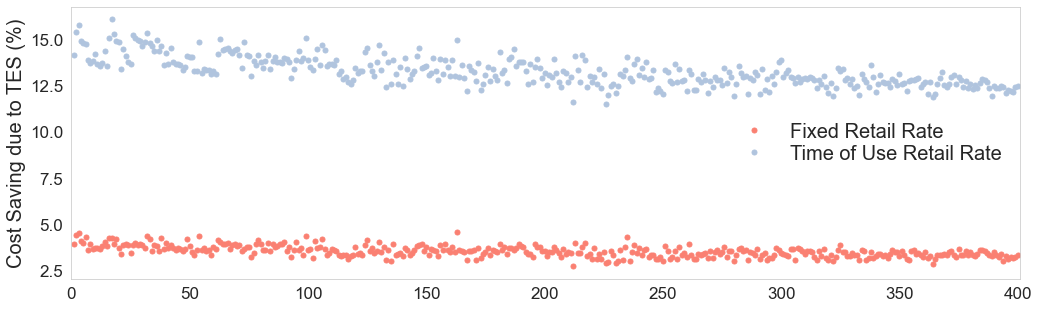

In [46]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - Fixed']*100, marker='o', ms=5, linestyle='',color = 'salmon', label='Fixed Retail Rate')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving % - ToD']*100, marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Time of Use Retail Rate')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
#plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES (%)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, frameon=False, labelspacing=0.15)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_ToD_pct'+salt+'.png', dpi=300, bbox_inches='tight')

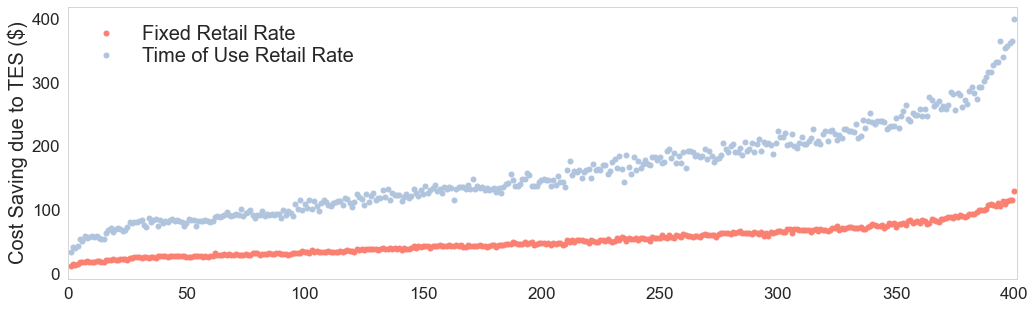

In [47]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - Fixed'], marker='o', ms=5, linestyle='',color = 'salmon', label='Fixed Retail Rate')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['cost saving - ToD'], marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Time of Use Retail Rate')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
#plt.xlabel("Representative Home",fontsize=20)
plt.ylabel("Cost Saving due to TES ($)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, frameon=False, labelspacing=0.15)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_ToD_dollars'+salt+'.png', dpi=300, bbox_inches='tight')

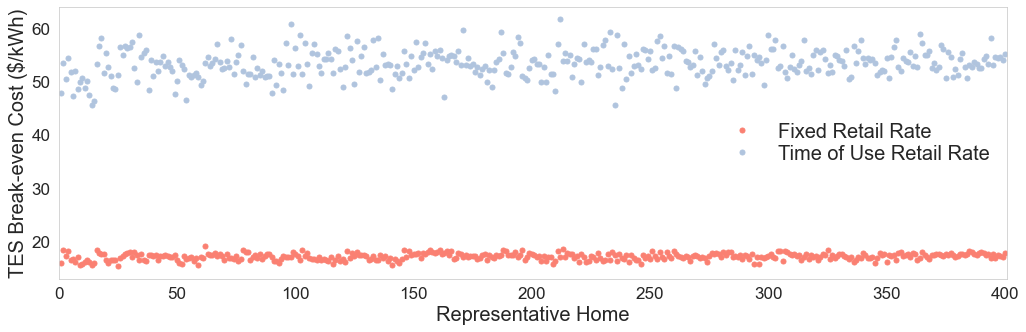

In [48]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kWh - Fixed'], marker='o', ms=5, linestyle='',color = 'salmon', label='Fixed Retail Rate')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kWh - ToD'], marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Time of Use Retail Rate')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
plt.xlabel("Representative Home",fontsize=20)
plt.ylabel("TES Break-even Cost ($/kWh)", fontsize=20)
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, frameon=False, labelspacing=0.15)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_ToD_kWh'+salt+'.png', dpi=300, bbox_inches='tight')

In [19]:
ordered_cost_reset.mean()

index                            199.500000
building id                      200.500000
total cost - no TES - Fixed     1478.305333
total cost - no TES - ToD       1227.490666
total cost - Fixed              1426.925280
total cost - ToD                1067.743990
cost saving - Fixed               51.380053
cost saving - ToD                159.746676
cost saving % - Fixed              0.035623
cost saving % - ToD                0.132858
peak load                         12.540729
Peak Load                         12.540729
Load                           24133.367158
Load Factor                        0.214600
MgSO4 Salt Mass                   44.586517
e cap - MgSO4                     33.439887
saving per kg - Fixed             22.980769
saving per kg - ToD               71.392263
saving per kWh - Fixed            17.235576
saving per kWh - ToD              53.544197
building                         200.500000
dtype: float64